<a href="https://colab.research.google.com/github/aissam-out/Predicting-Heart-Disease/blob/master/Exploration_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive #if needed
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.3MB/s 


In [0]:
link_to_train_values = 'https://drive.google.com/open?id=**********'
link_to_train_labels = 'https://drive.google.com/open?id=**********'

downloaded_train_v = drive.CreateFile({'id':'**********'}) 
downloaded_train_l = drive.CreateFile({'id':'**********'}) 

downloaded_train_v.GetContentFile('train_values.csv')
downloaded_train_l.GetContentFile('train_labels.csv')

# loading the dataset
df_train_v = pd.read_csv("train_values.csv")
df_train_l = pd.read_csv("train_labels.csv")

# Data Exploration

In [0]:
data = df_train_v.copy()
data['labels'] = df_train_l['heart_disease_present']
data.sample()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,labels
173,5o32oi,1,reversible_defect,140,4,0,0,0,299,1.6,1,51,173,1,1


In [0]:
# Features
print(data.info())
# shape
print("data shape : ", data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
labels                                  180 non-null int64
dtypes

In [0]:
data['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [0]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'labels'],
      dtype='object')

In [0]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,labels
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [0]:
#How many NA elements in every column
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
labels                                  0
dtype: int64

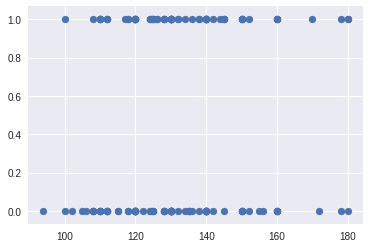

In [0]:
x=data["resting_blood_pressure"]
y=data["labels"]
plt.scatter(x, y)
#plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


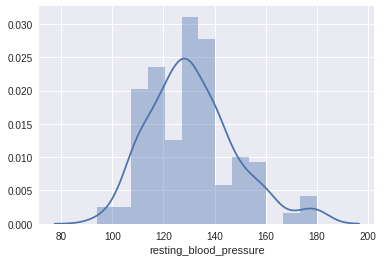

In [0]:
sns.distplot(data['resting_blood_pressure'])

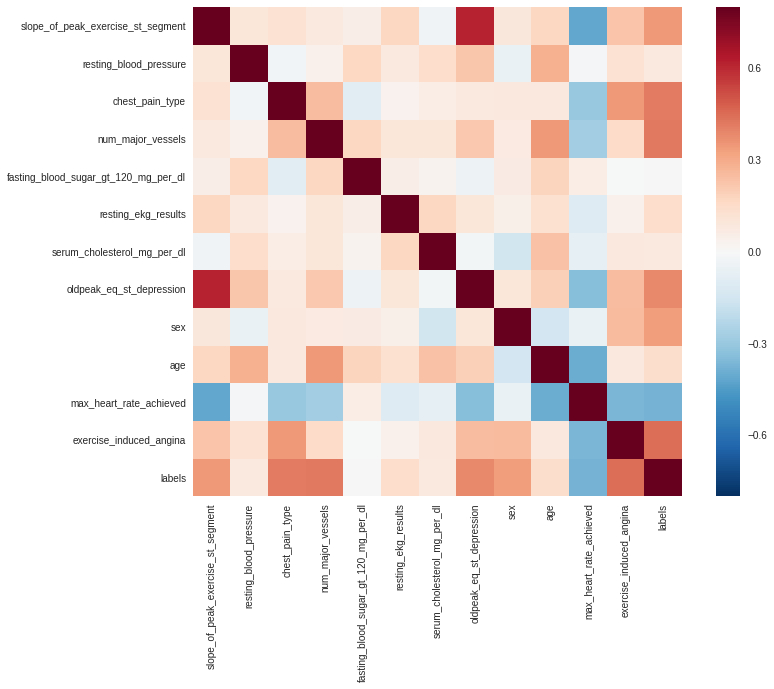

In [0]:
# correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


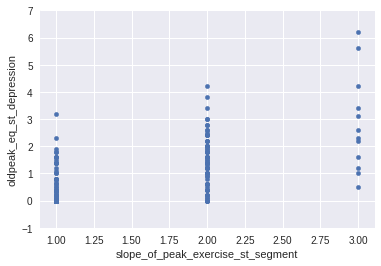

In [0]:
var = 'slope_of_peak_exercise_st_segment'
data_1 = pd.concat([data['oldpeak_eq_st_depression'], data[var]], axis=1)
data_1.plot.scatter(x=var, y='oldpeak_eq_st_depression', ylim=(-1,7))

# Training

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_train_v, df_train_l, test_size=0.2)

In [0]:
X_train['thal'] = X_train['thal'].replace({'normal':0,'reversible_defect':1, 'fixed_defect':2})
X_test['thal'] = X_test['thal'].replace({'normal':0,'reversible_defect':1, 'fixed_defect':2})

In [0]:
X_train = X_train.drop("patient_id", axis=1)
X_test = X_test.drop("patient_id", axis=1)
y_train = y_train.drop("patient_id", axis=1)
y_test = y_test.drop("patient_id", axis=1)

In [0]:
X_train.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
89,1,0,130,2,0,0,0,262,0.0,1,55,155,0
147,2,0,134,1,2,0,0,234,2.6,1,61,145,0
11,1,0,140,4,0,0,0,226,0.0,1,42,178,0
128,3,1,145,4,0,0,0,174,2.6,1,70,125,1
115,1,0,140,3,0,1,2,211,0.0,1,58,165,0


In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

In [0]:
# Predicting the test set results

Y_Pred = classifier.predict(X_test)

In [0]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_Pred)

In [0]:
cm

array([[17,  5],
       [ 3, 11]])

In [0]:
acc = (cm[1,0]+cm[0,1])*100 / (cm[0,0]+cm[1,1]) 
print("Error: ", acc , "%")


Error:  28.571428571428573 %
